In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
artifacts = pd.read_csv('./data/artifacts/artifacts_ext.csv', sep=';') 


In [3]:
artifacts.head(22)

,start_x,start_y,end_x,end_y,other_point_x,other_point_y,position_x,Unnamed: 7
0,13133.0,0.326285,13163.0,0.265704,13139.0,0.704001,13139.0,NaN
1,13239.0,0.228547,13298.0,0.254014,13259.0,0.904992,13259.0,NaN
2,13676.0,0.304149,13682.0,0.304149,13681.0,0.265585,13681.0,NaN
3,15416.0,0.458328,15421.0,0.599344,15420.0,0.928858,15420.0,NaN
4,15517.0,0.389804,15522.0,0.389804,15521.0,0.446121,15521.0,NaN
5,15829.0,0.041496,15849.0,0.136757,15839.0,-0.812417,15839.0,NaN
6,16073.0,0.125265,16085.0,0.151310,16078.0,-0.094777,16078.0,NaN
7,16133.0,0.168417,16141.0,0.121713,16139.0,0.387893,16139.0,NaN
8,16260.0,0.258200,16269.0,0.307401,16261.0,0.635211,16260.0,NaN
9,16365.0,0.271688,16369.0,0.287189,16365.0,0.683031,16365.0,NaN


In [4]:
artifacts.drop(columns='Unnamed: 7', inplace=True)
artifacts.head()

,start_x,start_y,end_x,end_y,other_point_x,other_point_y,position_x
0,13133.0,0.326285,13163.0,0.265704,13139.0,0.704001,13139.0
1,13239.0,0.228547,13298.0,0.254014,13259.0,0.904992,13259.0
2,13676.0,0.304149,13682.0,0.304149,13681.0,0.265585,13681.0
3,15416.0,0.458328,15421.0,0.599344,15420.0,0.928858,15420.0
4,15517.0,0.389804,15522.0,0.389804,15521.0,0.446121,15521.0


In [5]:
artifacts.insert(len(artifacts.columns), 'width', 0)
artifacts.insert(len(artifacts.columns), 'speed', 0)
artifacts.insert(len(artifacts.columns), 'percentage_position', 0)
artifacts.head()

,start_x,start_y,end_x,end_y,other_point_x,other_point_y,position_x,width,speed,percentage_position
0,13133.0,0.326285,13163.0,0.265704,13139.0,0.704001,13139.0,0,0,0
1,13239.0,0.228547,13298.0,0.254014,13259.0,0.904992,13259.0,0,0,0
2,13676.0,0.304149,13682.0,0.304149,13681.0,0.265585,13681.0,0,0,0
3,15416.0,0.458328,15421.0,0.599344,15420.0,0.928858,15420.0,0,0,0
4,15517.0,0.389804,15522.0,0.389804,15521.0,0.446121,15521.0,0,0,0


In [6]:
artifacts["width"] = artifacts["end_x"] - artifacts["start_x"]
artifacts["percentage_position"] = (artifacts["position_x"] - artifacts["start_x"]) / (artifacts["end_x"] - artifacts["start_x"])

In [7]:
for row in range(len(artifacts)):
    if (artifacts['start_x'][row] == artifacts['position_x'][row]):
        artifacts["speed"][row] = (artifacts["end_y"][row] - artifacts["other_point_y"][row]) / (artifacts["end_x"][row] - artifacts["other_point_x"][row])
    else:
        artifacts["speed"][row] = (artifacts["other_point_y"][row] - artifacts["start_y"][row]) / (artifacts["other_point_x"][row] - artifacts["start_x"][row])

C:\Users\FK4467\AppData\Local\Temp\1\ipykernel_17032\3045428253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artifacts["speed"][row] = (artifacts["other_point_y"][row] - artifacts["start_y"][row]) / (artifacts["other_point_x"][row] - artifacts["start_x"][row])


In [8]:
artifacts.dropna(inplace=True)

In [9]:
len(artifacts)

120

In [10]:
print('mean width: ', artifacts["width"].mean(axis=0))
print('std width: ', artifacts["width"].std(axis=0))
print('max width: ', artifacts["width"].max(axis=0))
print('min width: ', artifacts["width"].min(axis=0))

print('mean speed: ', artifacts["speed"].abs().mean(axis=0))
print('std speed: ', artifacts["speed"].abs().std(axis=0))
print('max speed: ', artifacts["speed"].abs().max(axis=0))
print('min speed: ', artifacts["speed"].abs().min(axis=0))

print('mean position: ', artifacts["percentage_position"].mean(axis=0))
print('std position: ', artifacts["percentage_position"].std(axis=0))
print('max position: ', artifacts["percentage_position"].max(axis=0))
print('min position: ', artifacts["percentage_position"].min(axis=0))

mean width:  25.308333333333334
std width:  15.703554076840621
max width:  59.0
min width:  2.0
mean speed:  0.14569433605368048
std speed:  0.09722919382039504
max speed:  0.3866543214285714
min speed:  0.00023257699166666666
mean position:  0.39321247058105724
std position:  0.305354760921476
max position:  1.0
min position:  0.0


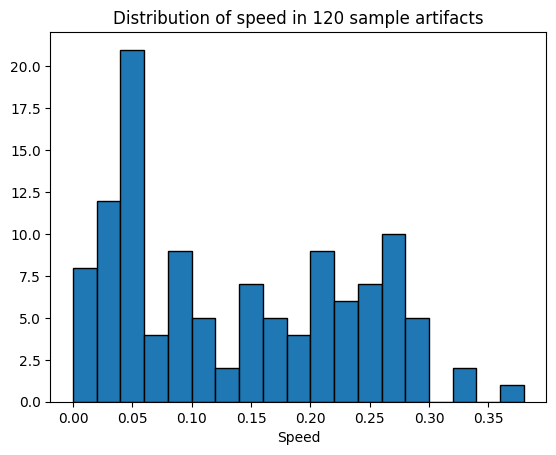

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39]
[ 8 12 21  4  9  5  2  7  5  4  9  6  7 10  5  0  2  0  1]


In [12]:
import matplotlib.pyplot as plt
import numpy as np

counts, edges = np.histogram(artifacts['speed'].abs(), bins=19, range=[0.01 , 0.39])
#artifacts['speed'].abs().plot(kind='kde')
# Plot the histogram with the computed counts and edges
plt.bar(edges[:-1], counts, width=np.diff(edges), edgecolor='black')
#print(artifacts)
plt.xlabel('Speed') 
plt.title('Distribution of speed in 120 sample artifacts')
plt.show()

print(edges)
print(counts)

weights = counts/sum(counts)

In [13]:
print(weights)

[0.06837607 0.1025641  0.17948718 0.03418803 0.07692308 0.04273504
 0.01709402 0.05982906 0.04273504 0.03418803 0.07692308 0.05128205
 0.05982906 0.08547009 0.04273504 0.         0.01709402 0.
 0.00854701]


In [61]:
0.15966387/0.00840336

19.000003570000572